# 머신러닝 프레임워크: scikit-learn

In [122]:
xor_input = [
  [0,0,0],
  [0,1,1],
  [1,0,1],
  [1,1,0]
]

In [123]:
import pandas as pd

xor_df = pd.DataFrame(xor_input)
xor_data = xor_df.iloc[:,0:2]
xor_label = xor_df.iloc[:,2]


In [124]:
from sklearn import svm, metrics
clf = svm.SVC()
clf.fit(xor_data, xor_label)

pred = clf.predict(xor_data)
print(pred)

[0 1 1 0]


In [125]:
# 정답률 구하기
ac_score = metrics.accuracy_score(xor_label, pred)
print(ac_score)

1.0


In [126]:
# score: training data와 valid data가 있을 때 과대적합인지 과소적합인지 확인
clf.score(xor_data, xor_label)

1.0

# iris 분류

In [127]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [128]:
# 기본 통계량 확인
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [129]:
# NaN 확인
iris.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

In [130]:
# 품종을 컬러값으로 구분하기 위한 list
color_tmp = []

for name in iris.Name:
  if name == 'Iris-setosa':
    color_tmp.append('r')
  elif name == 'Iris-versicolor':
    color_tmp.append('g')
  else:
    color_tmp.append('b')

iris['Color'] = color_tmp
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Color
0,5.1,3.5,1.4,0.2,Iris-setosa,r
1,4.9,3.0,1.4,0.2,Iris-setosa,r
2,4.7,3.2,1.3,0.2,Iris-setosa,r
3,4.6,3.1,1.5,0.2,Iris-setosa,r
4,5.0,3.6,1.4,0.2,Iris-setosa,r


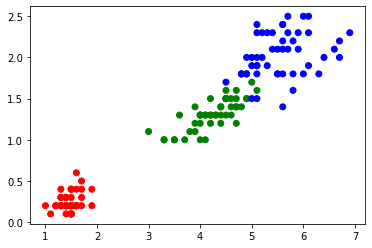

In [131]:
# draw sctter plot
import matplotlib.pyplot as plt
# draw scatter plot
plt.scatter(iris.PetalLength, iris.PetalWidth, c=iris.Color)

In [132]:
# 머신러닝을 위한 작업
iris_data = iris.iloc[:,0:4]
iris_label = iris.iloc[:,4]


In [133]:
# 학습용 데이터와 테스트용 데이터로 나누기
from sklearn.model_selection import train_test_split
# 학습용 데이터와 테스트용 데이터로 나누기
x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_label)
print(x_train.shape)

(112, 4)


In [134]:
# 학습시키기
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

In [135]:
# 예측하기
pred = clf.predict(x_test)
print(pred)

['Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica']


In [136]:
# 정답률
ac_score = metrics.accuracy_score(y_test, pred)
print(ac_score)

0.9736842105263158


In [137]:
# training 정답률
clf.score(x_train, y_train)

0.9553571428571429

In [138]:
# Test 정답률
clf.score(x_test, y_test)

0.9736842105263158

In [143]:
# 분류 Report(): Confusion Matrix
cl_report = metrics.classification_report(y_test, pred)
print(cl_report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [146]:
# predict [4.1, 3.5, 1.4, 0.2]
arr = [4.1, 3.5, 1.4, 0.2]
clf.predict([arr])

array(['Iris-setosa'], dtype=object)

In [154]:
print('accuracy', ac_score)
print('training accuracy', clf.score(x_train, y_train))
print('test accuracy', clf.score(x_test, y_test))
print('precision', metrics.precision_score(y_test, pred, average='macro'))
print('recall', metrics.recall_score(y_test, pred, average='macro'))
print('f1', metrics.f1_score(y_test, pred, average='macro'))

accuracy 0.9736842105263158
training accuracy 0.9553571428571429
test accuracy 0.9736842105263158
precision 0.9743589743589745
recall 0.9696969696969697
f1 0.9707936507936509
